Decision Tree Algorithm
https://medium.com/@penggongting/implementing-decision-tree-from-scratch-in-python-c732e7c69aea

In [0]:
import sklearn.datasets as datasets
import pandas as pd
breast=datasets.load_breast_cancer()
df=pd.DataFrame(breast.data, columns=breast.feature_names)
y=breast.target
print(y)

df.head(5)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

In [0]:
# Compare Complexity via Max depth!

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import cross_validate


dtree_2=DecisionTreeClassifier(max_depth=2)
dtree_3=DecisionTreeClassifier(max_depth=3)
dtree_5=DecisionTreeClassifier(max_depth=5)



wine=datasets.load_breast_cancer()
df=pd.DataFrame(wine.data, columns=wine.feature_names)
y=wine.target

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

cv_results_2 = cross_validate(dtree_2, df, y, cv=5)
cv_results_3 = cross_validate(dtree_3, df, y, cv=5)
cv_results_5 = cross_validate(dtree_5, df, y, cv=5)

print(cv_results_2['test_score'].mean())
print(cv_results_3['test_score'].mean())
print(cv_results_5['test_score'].mean())

0.9280184686417853
0.9244478645632936
0.9174913428241631


In [0]:
ac_dtc = cv_results_2['test_score'].mean()*100

ac_rf = cv_results_3['test_score'].mean()*100

ac_ex =cv_results_5['test_score'].mean()*100


accuracies_dict = {}


accuracies_dict["DecisionTree Depth = 2"] = ac_dtc


accuracies_dict["DecisionTree Depth = 3"] = ac_rf

accuracies_dict["DecisionTree Depth = 5"] = ac_ex



reg = LinearRegression()

cv_results_reg = cross_validate(reg, df, y, cv=5)
ac_reg =cv_results_reg['test_score'].mean()*100


accuracies_dict["Linear Regression"] = ac_reg


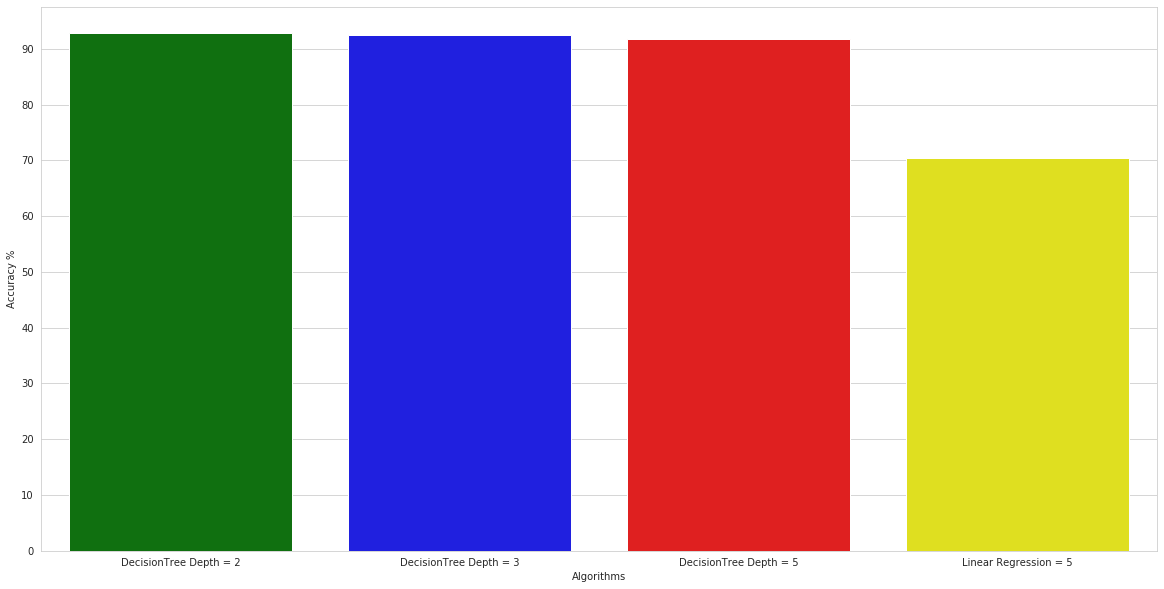

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["green", "blue","red","yellow"]
new_dict = {}
for key in sorted(accuracies_dict.keys()):
    new_dict[key] = accuracies_dict[key]
    
    
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(new_dict.keys()), y=list(new_dict.values()), palette=colors)
plt.show()

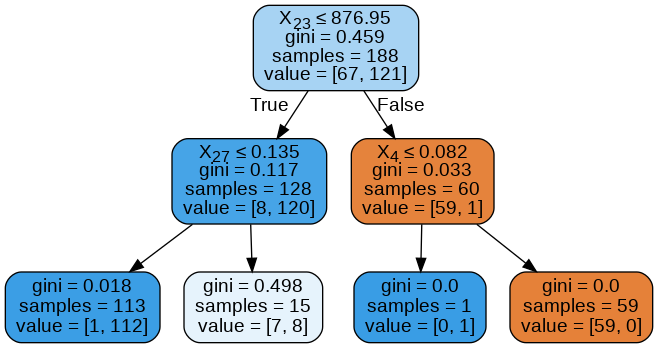

In [0]:

dtree_2.fit(X_test,y_test)



dot_data = StringIO()
export_graphviz(dtree_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




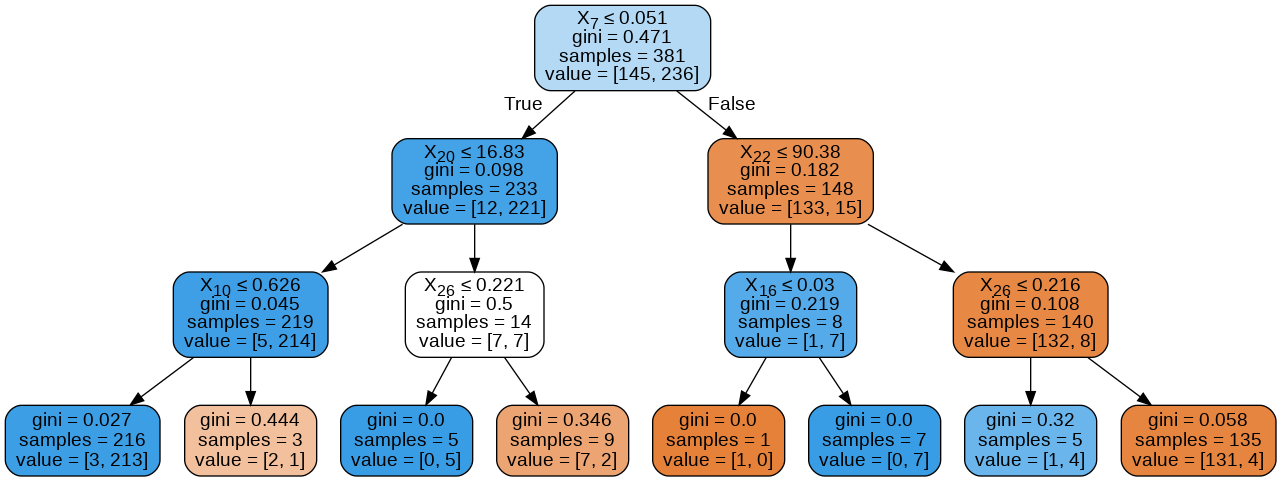

In [0]:
dtree_3.fit(X_test,y_test)

dot_data = StringIO()
export_graphviz(dtree_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

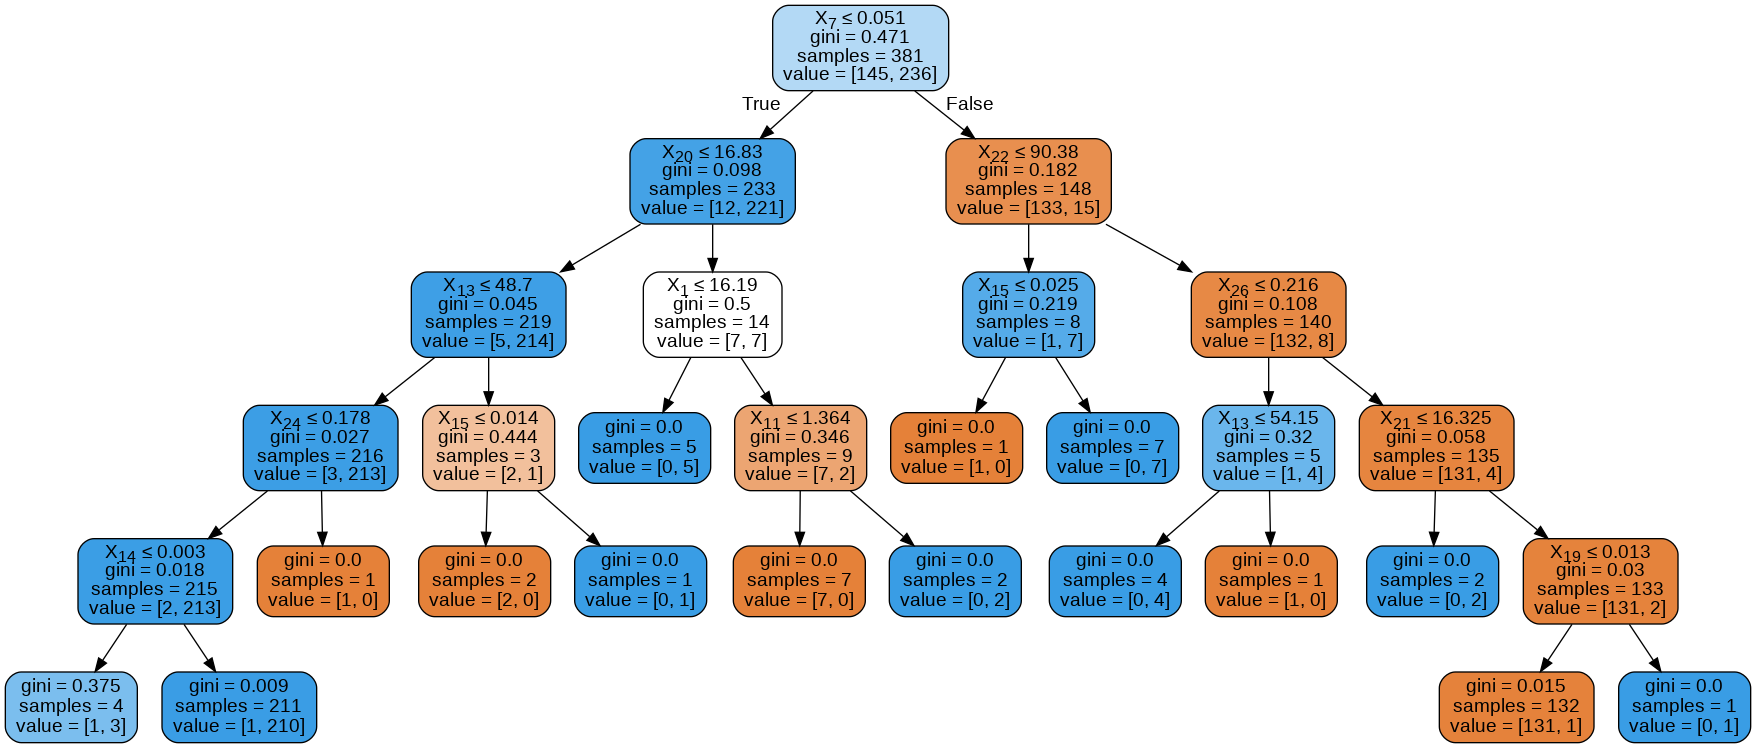

In [0]:
dtree_5.fit(X_test,y_test)
dot_data = StringIO()
export_graphviz(dtree_5, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

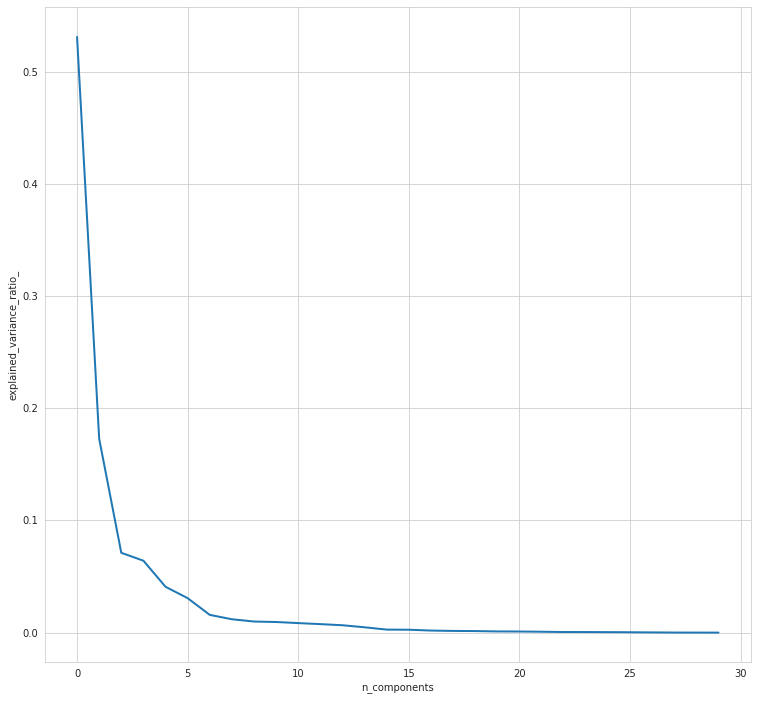

In [0]:

x = df

# split data train 70 % and test 30 %
all_data = x
#normalization
all_data = (all_data-all_data.mean())/(all_data.max()-all_data.min())


from sklearn.decomposition import PCA
pca = PCA()
pca.fit(all_data)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

In [0]:
pca_fit = pca.fit_transform(all_data)
pca_df = pd.DataFrame(pca_fit)
components = range(0,2)
pca_df = pca_df[components]
y=wine.target
print(len(y))
pca_train, pca_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.3, random_state=42)
dtree_pca_2=DecisionTreeClassifier(max_depth=2)
dtree_pca_2.fit(pca_train,y_train)

dtree_pca_3=DecisionTreeClassifier(max_depth=3)
dtree_pca_3.fit(pca_train,y_train)

dtree_pca_5=DecisionTreeClassifier(max_depth=5)
dtree_pca_5.fit(pca_train,y_train)


569


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

-1.391309421667579
2.6879567808174447
[1 1 1 ... 0 0 0]
            0         1  target
149 -0.434146 -0.319283       1
124 -0.295671 -0.138215       1
421  0.228557  0.324218       1
195 -0.404841 -0.151469       1
545 -0.305453 -0.183411       1
..        ...       ...     ...
71  -0.319751  0.854649       1
106 -0.129810  0.273444       1
270 -0.634670 -0.484501       1
435  0.215304  0.118807       0
102 -0.489696 -0.207577       1

[398 rows x 3 columns]
Index([0, 1, 'target'], dtype='object')


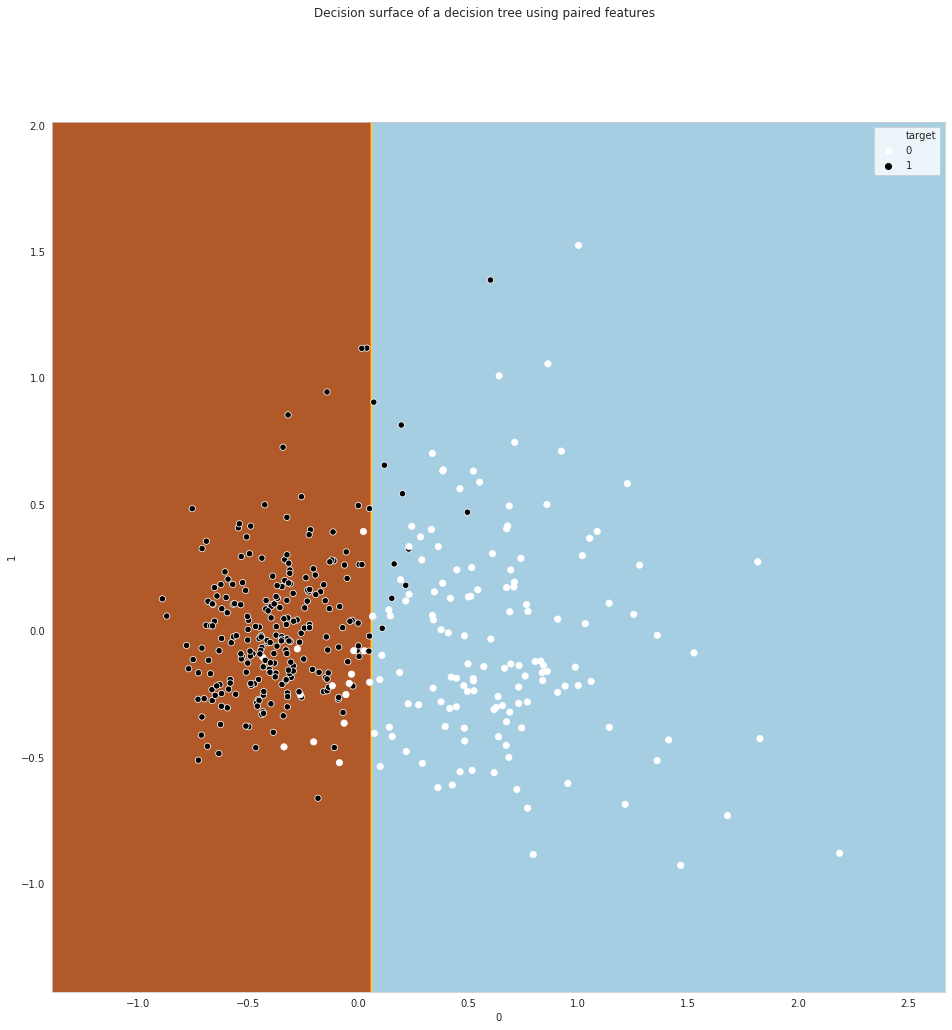

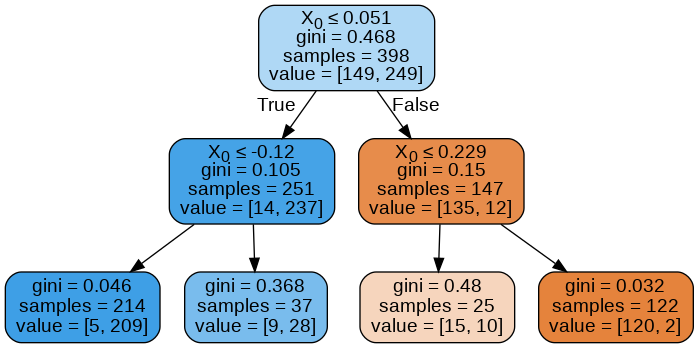

In [0]:
plot_step = 0.02
import seaborn as sns
for pairidx, pair in enumerate([[0, 1]]):
  # We only take the two corresponding features
  X = pca_train[pair]
  y = y_train

  # Plot the decision boundary
  plt.figure(figsize=(16,16))

  #plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[0].min() - .5, X[0].max() + .5
  y_min, y_max = X[1].min() - .5, X[1].max() + .5

  print(x_min)
  print(x_max)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
  Z = dtree_pca_2.predict(np.c_[xx.ravel(), yy.ravel()])
  print(Z)
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

  plt.xlabel("PCA_n_1")
  plt.ylabel("PCA_n_2")
  plt.axis("tight")

  plot_X = X
  plot_X["target"] = y_train
  print(plot_X)
  plot_colors = ["white","black"]
  print(plot_X.columns)
  sns.scatterplot(data=plot_X, x=0, y=1, hue="target",palette=plot_colors,s=40)

  plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()




dot_data = StringIO()
export_graphviz(dtree_pca_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



-1.391309421667579
2.6879567808174447
[1 1 1 ... 0 0 0]
            0         1  target
149 -0.434146 -0.319283       1
124 -0.295671 -0.138215       1
421  0.228557  0.324218       1
195 -0.404841 -0.151469       1
545 -0.305453 -0.183411       1
..        ...       ...     ...
71  -0.319751  0.854649       1
106 -0.129810  0.273444       1
270 -0.634670 -0.484501       1
435  0.215304  0.118807       0
102 -0.489696 -0.207577       1

[398 rows x 3 columns]
Index([0, 1, 'target'], dtype='object')


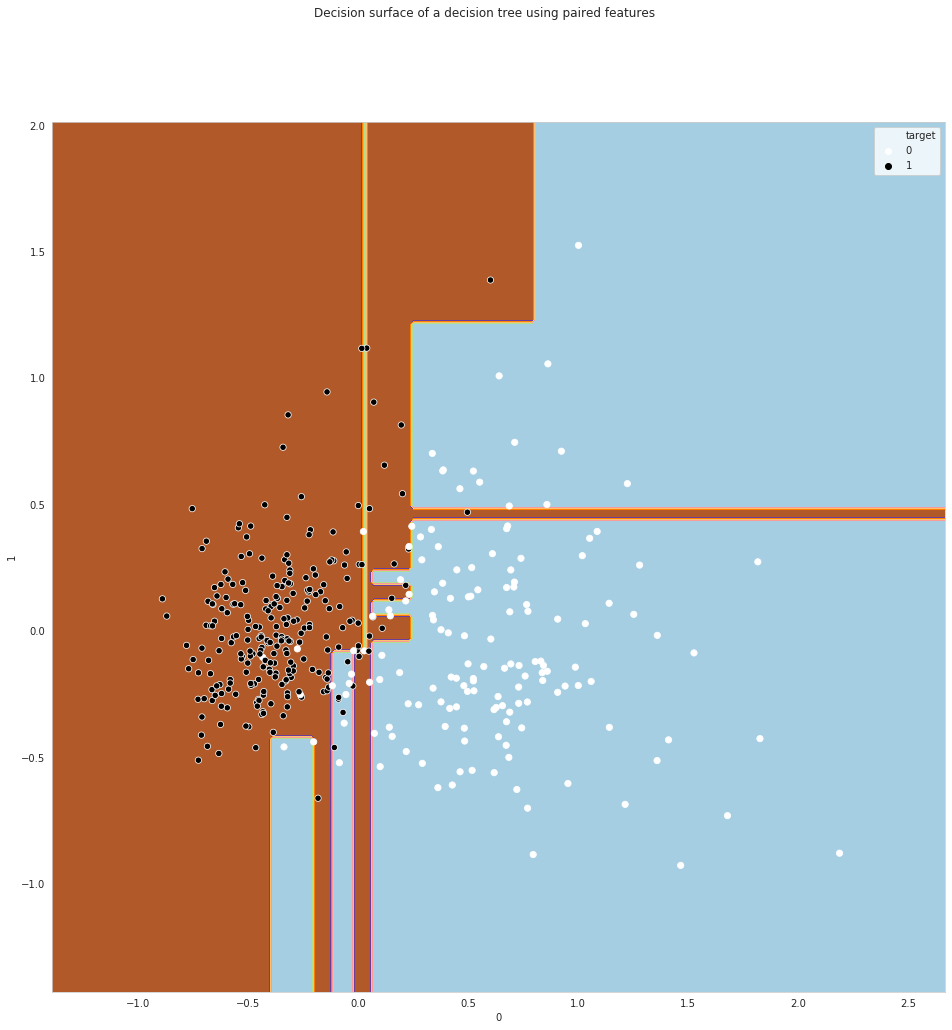

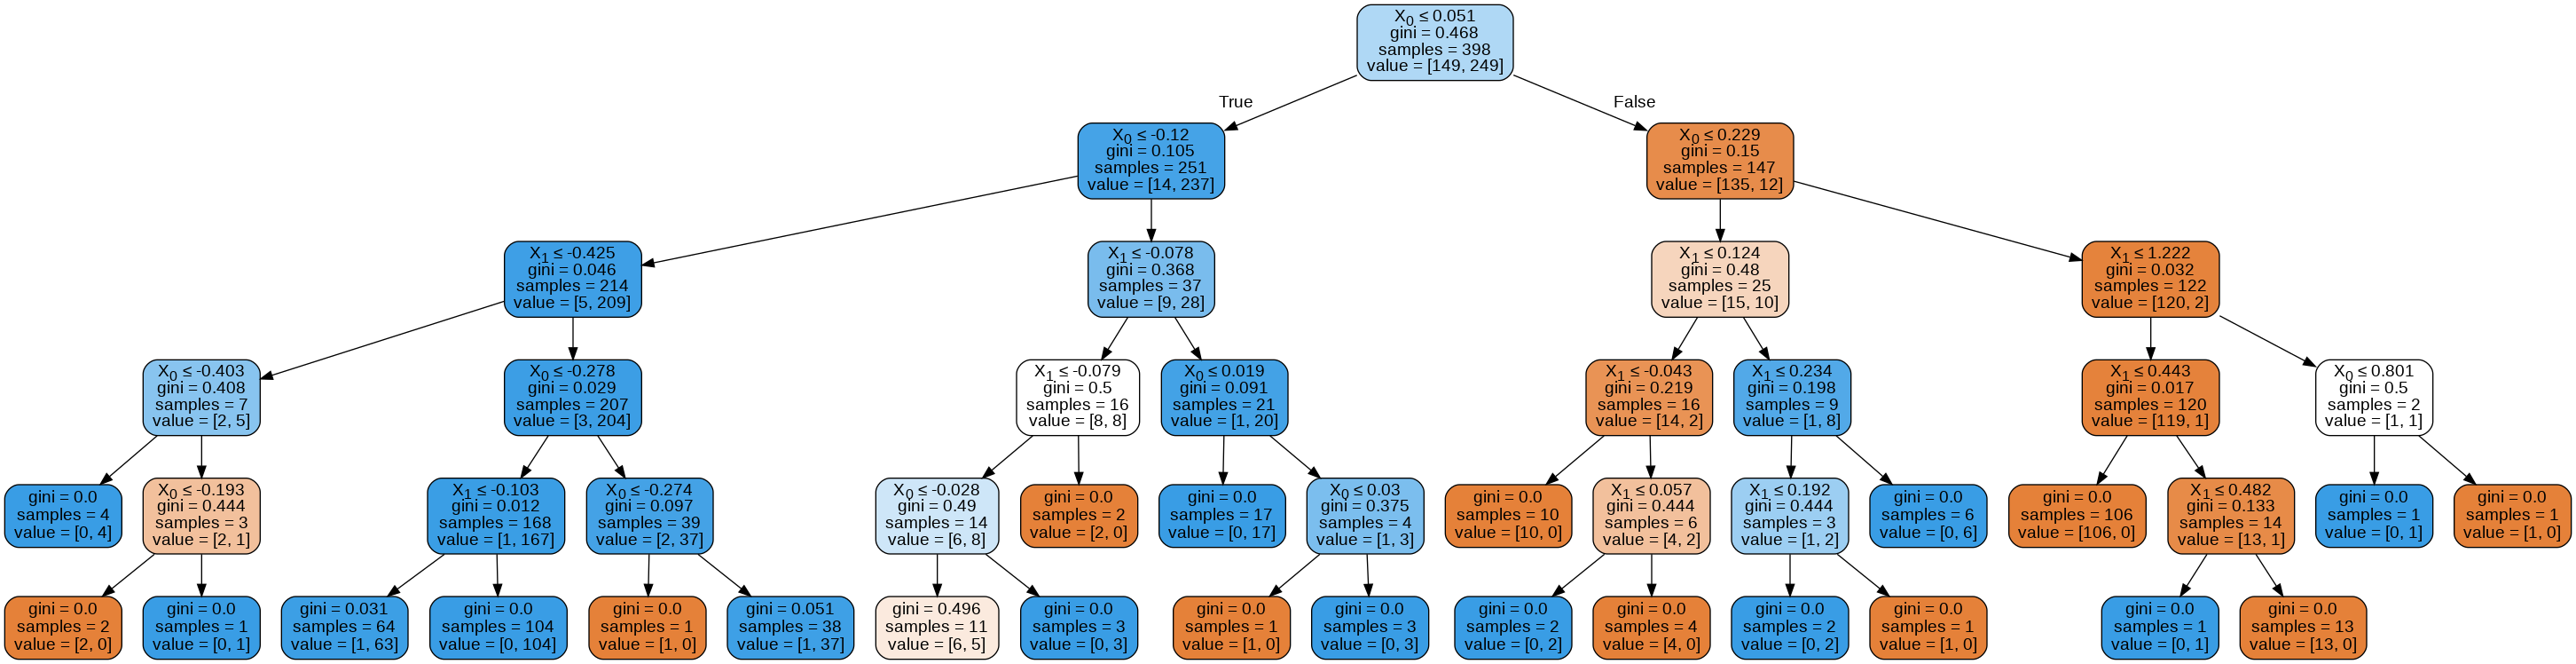

In [0]:
for pairidx, pair in enumerate([[0, 1]]):
  # We only take the two corresponding features
  X = pca_train[pair]
  y = y_train

  # Plot the decision boundary
  plt.figure(figsize=(16,16))

  #plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[0].min() - .5, X[0].max() + .5
  y_min, y_max = X[1].min() - .5, X[1].max() + .5

  print(x_min)
  print(x_max)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
  Z = dtree_pca_5.predict(np.c_[xx.ravel(), yy.ravel()])
  print(Z)
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

  plt.xlabel("PCA_n_1")
  plt.ylabel("PCA_n_2")
  plt.axis("tight")

  plot_X = X
  plot_X["target"] = y_train
  print(plot_X)
  plot_colors = ["white","black"]
  print(plot_X.columns)
  sns.scatterplot(data=plot_X, x=0, y=1, hue="target",palette=plot_colors,s=40)

  plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()




dot_data = StringIO()
export_graphviz(dtree_pca_5, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())